In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
import scipy.io

# Question 1

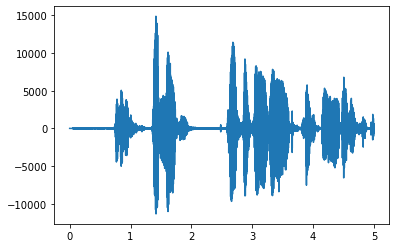

In [3]:
samplerate, t = wavfile.read("dspvoice.wav")
tl = int(t.shape[0] / samplerate)
sr = 8000
y = scipy.signal.resample(t, int(tl*sr))[:,0]

Ts = 5.0
y = y[:int(Ts*sr)]
t = np.linspace(0., Ts, int(Ts*sr)) 

plt.plot(t,y)
plt.show()

In [3]:
blockT = 0.04
chunk  = int(Ts/blockT)
windowLength = int(len(y)/chunk)
x = np.zeros_like(y)

for predictionLength in [4,8,16]:
    idx = 0
    processingGain = 0.0
    for i in range(chunk):
        y_now = y[(windowLength*i) : windowLength*(i + 1)]

        R = np.zeros((predictionLength, predictionLength))
        q = np.zeros((predictionLength,1))
        for i in range(predictionLength,len(y_now)):
            x_pred = y_now[i - predictionLength : i].reshape((predictionLength,1))

            R = R + np.matmul(x_pred, x_pred.T)
            temp = y_now[i - predictionLength : i]*y_now[i]
            q = q + temp.reshape((predictionLength,1))


        R = R/(len(y_now) - predictionLength)
        q = q/(len(y_now) - predictionLength)


        w_optimal = np.matmul(np.linalg.pinv(R), q)

        x_hat = np.zeros(len(y_now))
        for i in range(predictionLength):
            x[idx]=y_now[i]
            idx+=1

        for i in range(predictionLength,windowLength):
            x_pred = y_now[i - predictionLength : i]
            x[idx]=np.matmul(w_optimal.T, x_pred)
            idx+=1


    eta = y - x
    processingGain = np.var(y_now)/np.var(eta)

    print("For prediction length = ",predictionLength," Processing gain = ",processingGain)

For prediction length =  4  Processing gain =  0.00032213560927337137
For prediction length =  8  Processing gain =  0.0004787800227015636
For prediction length =  16  Processing gain =  0.0007735418536903521


In [16]:
blockT = 0.04
chunk  = int(Ts/blockT)
windowLength = int(len(y)/chunk)
var = np.zeros(chunk)
varlist = []
for predictionLength in [4,8,16]:
    processingGain = 0.0
    for i in range(chunk):
        y_now = y[(windowLength*i) : windowLength*(i + 1)]

        R = np.zeros((predictionLength, predictionLength))
        q = np.zeros((predictionLength,1))
        for j in range(predictionLength,len(y_now)):
            x_pred = y_now[j - predictionLength : j].reshape((predictionLength,1))

            R = R + np.matmul(x_pred, x_pred.T)
            temp = y_now[j - predictionLength : j]*y_now[j]
            q = q + temp.reshape((predictionLength,1))


        R = R/(len(y_now) - predictionLength)
        q = q/(len(y_now) - predictionLength)


        w_optimal = np.matmul(np.linalg.pinv(R), q)

        x_hat = np.zeros(len(y_now))
        for j in range(predictionLength):
            x_hat[j] = y_now[j]

        for j in range(predictionLength,len(y_now)):
            x_pred = y_now[j - predictionLength : j]
            x_hat[j] = np.matmul(w_optimal.T, x_pred)


        eta = y_now - x_hat
        processingGain += np.var(y_now)/np.var(eta)
        var[i]=np.var(y_now)/np.var(eta)
    varlist.append(np.copy(var))
    print("For prediction length = ",predictionLength," Processing gain = ",processingGain/chunk)

For prediction length =  4  Processing gain =  109429.51134200403
For prediction length =  8  Processing gain =  112706.1582068326
For prediction length =  16  Processing gain =  1272787.7128289242


In [18]:
np.mean(varlist[0][1:chunk]),np.mean(varlist[1][1:chunk]), np.mean(varlist[2][1:chunk])

(56.289460482155256, 81.673885409993, 116.28203167503216)

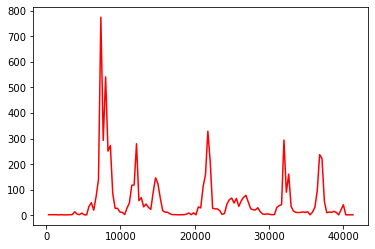

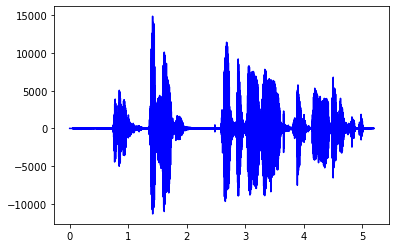

In [34]:
plt.plot([a*windowLength for a in range(1,chunk)],varlist[0][1:],'r')
plt.show()
plt.plot(t,y,'b')
plt.show()

In [ ]:
list(range(1,chunk)*windowLength)

In [5]:
var[:chunk], var[chunk:2*chunk], var[2*chunk:]

([14218575.134058323,
  2.026905741249789,
  1.8348186439561325,
  1.9810234206828268,
  2.332298239675873,
  1.4072019540503047,
  1.8651688898817524,
  1.7533355377019704,
  1.200385892691178,
  1.4706538685189698,
  1.9370782928278711,
  2.3519263461549866,
  13.47482523331963,
  4.4467144842454545,
  2.264665828842702,
  8.466686020117285,
  1.6796475500632466,
  1.280027905090353,
  34.34749717574919,
  49.000297514208356,
  19.76466497942369,
  72.77824024366886,
  139.69758735445825,
  774.4010979599549,
  292.7576608559761,
  540.9754400465525,
  250.64822461211747,
  272.5955243533577,
  85.12065979995907,
  27.114350349513757,
  27.03888151982816,
  12.543277431285972,
  11.382503483507453,
  2.657522406324968,
  28.035150013048558,
  48.2007347206225,
  116.72694029526576,
  118.75747945243351,
  279.72517873458077,
  57.038883304290415,
  68.87440648081883,
  32.79646395920612,
  43.769108075839526,
  30.87702470302009,
  22.642499265430356,
  89.53323981595504,
  146.32718

# Question 2

In [6]:
alpha =2
for alpha in [2,5,10,100,200,500,1000]:
    y_dash = scipy.signal.resample(y, int(Ts*sr*alpha))
    print("alpha = ",alpha,"max mod dxbydt = ",np.abs(y_dash[1:]-y_dash[:-1]).max())

alpha =  2 max mod dxbydt =  5048.676396868623
alpha =  5 max mod dxbydt =  2069.3016250972532
alpha =  10 max mod dxbydt =  1036.8495389027648
alpha =  100 max mod dxbydt =  103.73035642864852
alpha =  200 max mod dxbydt =  51.86537696834239
alpha =  500 max mod dxbydt =  20.74617668857536
alpha =  1000 max mod dxbydt =  10.37309085419838


In [7]:
delta = 20
vals = [10,100,200,350,500,1000]
SNRs = []
for alpha in vals:
    y_dash = scipy.signal.resample(y, int(Ts*sr*alpha))
    curr_sum = 0.0
    output = np.zeros_like(y_dash)
    for i,yi in enumerate(y_dash):
        if curr_sum>=yi:
            curr_sum-=delta
        else:
            curr_sum+=delta
        output[i]=curr_sum
        
    P = np.mean(np.square(output))
    mse = np.mean(np.square(output-y_dash))
    SNRs.append(P/mse)

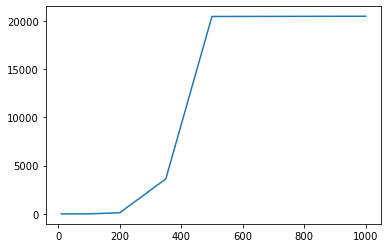

In [8]:
plt.plot(vals,SNRs)
plt.show()

In [9]:
alpha = 100
vals = [5,20,50,100,200,500]
SNRs = []
y_dash = scipy.signal.resample(y, int(Ts*sr*alpha))
for delta in vals:
    curr_sum = 0.0
    output = np.zeros_like(y_dash)
    for i,yi in enumerate(y_dash):
        if curr_sum>=yi:
            curr_sum-=delta
        else:
            curr_sum+=delta
        output[i]=curr_sum
        
    P = np.mean(np.square(output))
    mse = np.mean(np.square(output-y_dash))
    SNRs.append(P/mse)

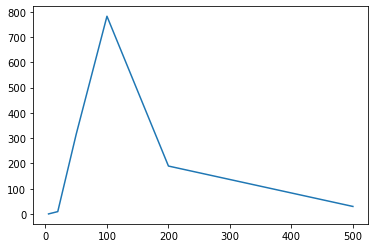

In [10]:
plt.plot(vals,SNRs)
plt.show()